### [Titanic: Machine Learning from Disaster](https://www.kaggle.com/datasets/shuofxz/titanic-machine-learning-from-disaster)

In [32]:
import pandas as pd
import numpy as np

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [34]:
train_data = pd.read_csv("datasets/train.csv")
test_data = pd.read_csv("datasets/test.csv")

In [35]:
# Let's take a peek at the top few rows of the training set:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The attributes have the following meaning:

* PassengerId: a unique identifier for each passenger
* Survived: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
* Pclass: passenger class.
* Name, Sex, Age: self-explanatory
* SibSp: how many siblings & spouses of the passenger aboard the Titanic.
* Parch: how many children & parents of the passenger aboard the Titanic.
* Ticket: ticket id
* Fare: price paid (in pounds)
* Cabin: passenger's cabin number
* Embarked: where the passenger embarked the Titanic

In [36]:
# Let's get more info to see how much data is missing:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

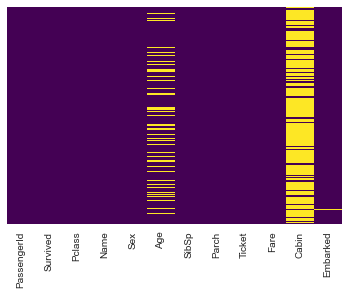

In [37]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We can see some Age, Cabin and Embarked attributes are sometimes null. We will ignore the Cabin for now and focus on the rest. The Age attribute has about 19% null values, so we will need to decide what to do with them. Replacing null values with the median age seems reasonable. We could be a bit smarter by predicting the age based on the other columns (for example, the median age is 37 in 1st class, 29 in 2nd class and 24 in 3rd class), but we'll keep things simple and just use the overall median age.

The Name and Ticket attributes may have some value, but they will be a bit tricky to convert into useful numbers that a model can consume. So for now, we will ignore them.

Let's take a look at the numerical attributes:

In [38]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [39]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

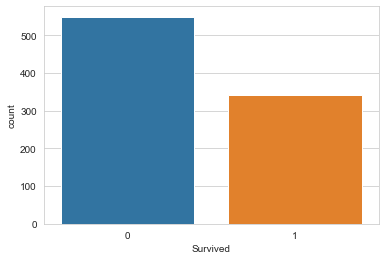

In [40]:
sns.countplot(x='Survived',data=train_data)

In [41]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

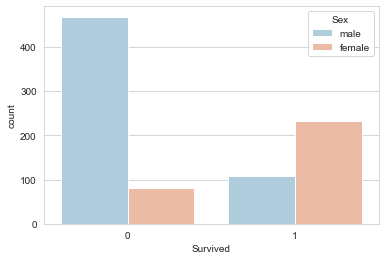

In [42]:
sns.countplot(x='Survived',data=train_data,hue='Sex',palette='RdBu_r')

Now let's take a quick look at all the categorical attributes:

In [43]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

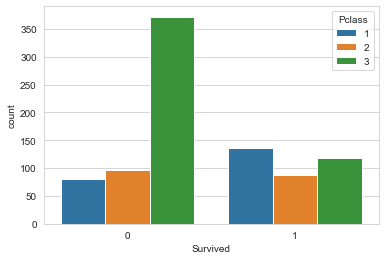

In [44]:
sns.countplot(x='Survived',data=train_data,hue='Pclass')

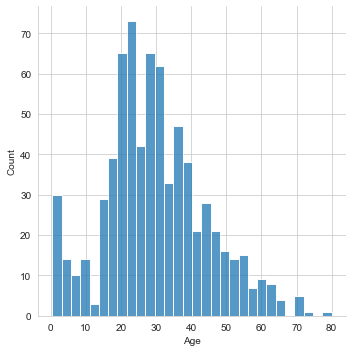

In [45]:
sns.displot(data=train_data['Age'].dropna(),kde=False,bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

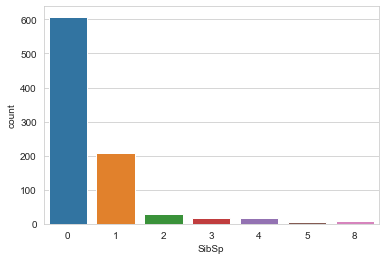

In [46]:
sns.countplot(x='SibSp',data=train_data)

<AxesSubplot:>

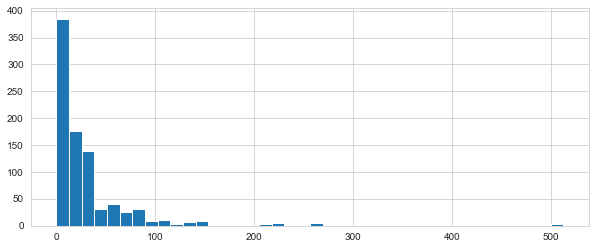

In [47]:
train_data['Fare'].hist(figsize=(10,4),bins=40)

In [48]:
import cufflinks as cf

cf.go_offline()

In [49]:
train_data['Fare'].iplot(kind='hist',bins=40)

In [50]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [51]:
train_data["Embarked"].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

The Embarked attribute tells us where the passenger embarked: C=Cherbourg, Q=Queenstown, S=Southampton.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

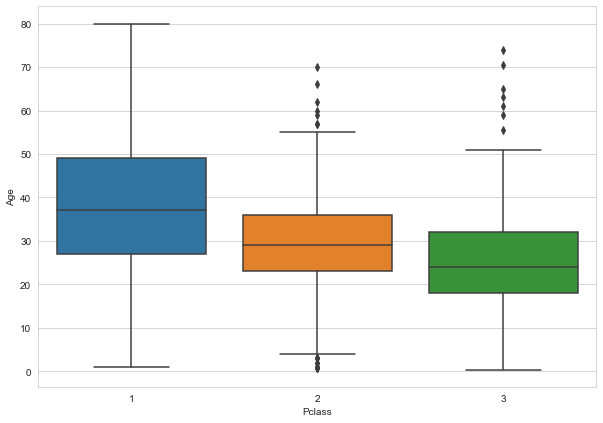

In [52]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train_data)

In [53]:
# function to calculate the missing age of the passenngers

def calculate_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        else:
            return 25
    else:
        return age
    

In [54]:
#train_data[train_data['Pclass']==3]['Age'].mean()
# update the missinng age
train_data['Age'] = train_data[['Age','Pclass']].apply(calculate_age,axis=1)

<AxesSubplot:>

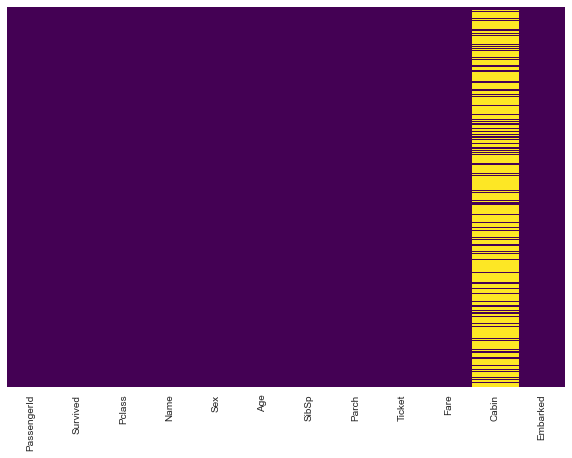

In [55]:
plt.figure(figsize=(10,7))
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We will ignore the Cabin for now and focus on the rest.

In [56]:
train_data.drop('Cabin',inplace=True,axis=1)

<AxesSubplot:>

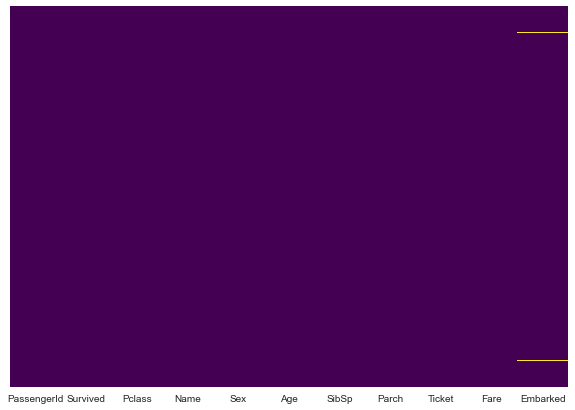

In [57]:
plt.figure(figsize=(10,7))
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [58]:
#drop rows with missing values
#train_data.head(1)
train_data.dropna(inplace=True)

<AxesSubplot:>

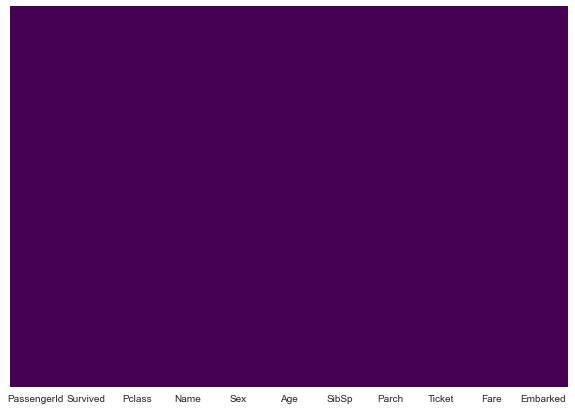

In [59]:
plt.figure(figsize=(10,7))
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

In [61]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

In [62]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [63]:
X_train = preprocess_pipeline.fit_transform(train_data[num_attribs + cat_attribs])

In [64]:
y_train = train_data["Survived"]

<span class="girk">We are now ready to train a classifier. Let's start with a RandomForestClassifier:</span>

In [65]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [66]:
X_test = preprocess_pipeline.transform(test_data[num_attribs + cat_attribs])
y_pred = forest_clf.predict(X_test)

In [67]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8122063329928497

<span class="girk">Let's try an SVC:</span>

In [68]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_clf.fit(X_train, y_train)
X_test_svc = preprocess_pipeline.transform(test_data[num_attribs + cat_attribs])
y_pred_svc = svm_clf.predict(X_test_svc)

In [69]:
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.8256767109295199

In [70]:
df = pd.DataFrame({'SVM':svm_scores, 'Random Forest':forest_scores})

Text(0, 0.5, 'Accuracy')

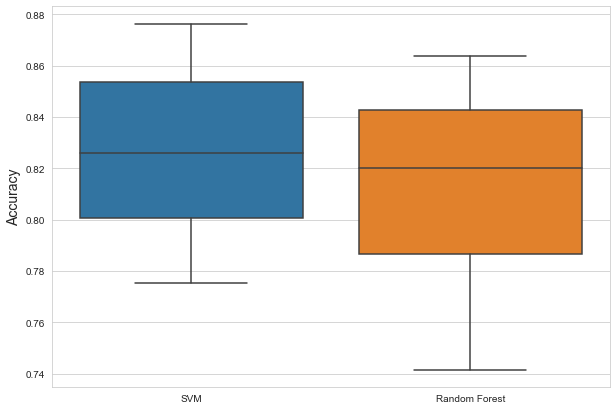

In [71]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df)
plt.ylabel("Accuracy", fontsize=14)

In [72]:
y_pred_svc.shape

#test_data.head(1)

(418,)

In [73]:
# Creating a result csv with PassengerId and predictions
import csv

with open('titanic_result1.csv', 'w',encoding='UTF8') as outcsv:
    writer = csv.writer(outcsv)
    writer.writerow(["PassengerId", "Survived"])
    
    for index, row in test_data.iterrows():
        writer.writerow([row['PassengerId'],y_pred_svc[index]])


In [84]:
# Checking sample predictions
titanic_result_data = pd.read_csv("titanic_result.csv")

titanic_result_data.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


<div class="girk">
Let's try a KNeighborsClassifier:</div><i class="fa fa-lightbulb-o "></i>

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.770 total time=   0.0s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.775 total time=   0.0s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.826 total time=   0.0s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.820 total time=   0.0s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.831 total time=   0.0s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.747 total time=   0.0s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.770 total time=   0.0s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.826 total time=   0.0s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.775 total time=   0.0s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.780 total time=   0.0s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.781 total time=   0.0s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [81]:
grid_search.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [95]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_train)
accuracy_score(y_train, y_pred)

0.8683914510686164

In [96]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)
knn_clf.fit(X_train, y_train)
y_pred_kneighbour = knn_clf.predict(X_test)

In [97]:
# Creating a result csv with PassengerId and predictions
import csv

with open('titanic_result1.csv', 'w',encoding='UTF8') as outcsv:
    writer = csv.writer(outcsv)
    writer.writerow(["PassengerId", "Survived"])
    
    for index, row in test_data.iterrows():
        writer.writerow([row['PassengerId'],y_pred_kneighbour[index]])



In [98]:
# Checking sample predictions
titanic_result_data = pd.read_csv("titanic_result1.csv")

titanic_result_data.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
